In [1]:
import pandas_datareader as web
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,LSTM
plt.style.use('fivethirtyeight')

2022-10-10 19:36:27.382667: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-10 19:36:27.382715: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:

df=web.DataReader('AAPL',data_source='yahoo')
#df=web.get_data_fred('GS10')



In [3]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-10,39.500000,38.775002,39.014999,38.974998,62468000.0,36.989822
2017-10-11,39.244999,38.937500,38.992500,39.137501,67622400.0,37.144054
2017-10-12,39.342499,38.932499,39.087502,39.000000,64500400.0,37.013554
2017-10-13,39.320000,39.102501,39.182499,39.247501,65576800.0,37.248440
2017-10-16,40.000000,39.412498,39.474998,39.970001,96486000.0,37.934147
...,...,...,...,...,...,...
2022-10-04,146.220001,144.259995,145.029999,146.100006,87830100.0,146.100006
2022-10-05,147.380005,143.009995,144.070007,146.399994,79471000.0,146.399994
2022-10-06,147.539993,145.220001,145.809998,145.429993,68402200.0,145.429993


In [4]:
df.isnull().sum()


High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

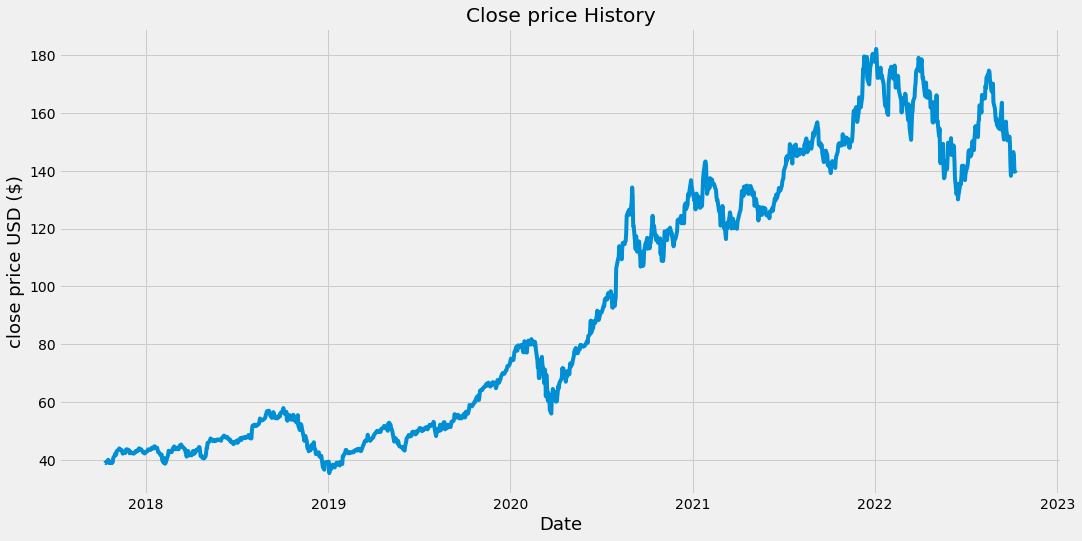

In [5]:
plt.figure(figsize=(16,8))
plt.title('Close price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price USD ($)', fontsize=18)
plt.show()

In [6]:
dataset=df.filter(['Close'])
dat=dataset.values
training_data_len = math.ceil(len(dat) * .8)

training_data_len

1008

In [7]:
dat

array([[ 38.97499847],
       [ 39.13750076],
       [ 39.        ],
       ...,
       [145.42999268],
       [140.08999634],
       [139.11000061]])

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dat)

scaled_data

array([[0.02340188],
       [0.0245114 ],
       [0.02357258],
       ...,
       [0.75024321],
       [0.71378339],
       [0.70709229]])

In [9]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.02340188, 0.0245114 , 0.02357258, 0.02526245, 0.03019545,
       0.03120253, 0.0299906 , 0.02353844, 0.02399931, 0.02386276,
       0.02545021, 0.02427243, 0.02597935, 0.03560639, 0.04187079,
       0.04583083, 0.04216096, 0.04424341, 0.05173679, 0.0547239 ,
       0.05567978, 0.05812069, 0.05750619, 0.05544081, 0.05424597,
       0.04975676, 0.04589912, 0.04934711, 0.04772551, 0.04743534,
       0.05282922, 0.05593583, 0.05595289, 0.05445079, 0.05270975,
       0.04658188, 0.0506273 , 0.04926176, 0.04712811, 0.04685499,
       0.04577962, 0.04630879, 0.04639412, 0.05202696, 0.05037125,
       0.05134421, 0.05125885, 0.05424597, 0.05842792, 0.0552189 ,
       0.05489461, 0.05602115, 0.05602115, 0.04844244, 0.04849365,
       0.04931297, 0.04615515, 0.05132712, 0.05127591, 0.05264146])]
[0.05600409477832419]



In [10]:
train_data.shape


(1008, 1)

In [11]:
x_train, y_train = np.array(x_train),np.array(y_train)


In [12]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(948, 60, 1)

In [13]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


2022-10-10 19:37:28.070783: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-10 19:37:28.070900: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-10 19:37:28.071182: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pendlimarri): /proc/driver/nvidia/version does not exist
2022-10-10 19:37:28.072227: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [15]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

2022-10-10 19:45:09.506958: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-10 19:45:09.562929: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1800000000 Hz


948/948 [==============================] - 68s 40ms/step - loss: 0.0072


In [19]:
test_data = scaled_data[training_data_len - 60: , :]
x_test=[]
y_test=dat[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [20]:
x_test = np.array(x_test)


In [22]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [23]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [24]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

6.007685140784518

/tmp/ipykernel_95828/1302397068.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


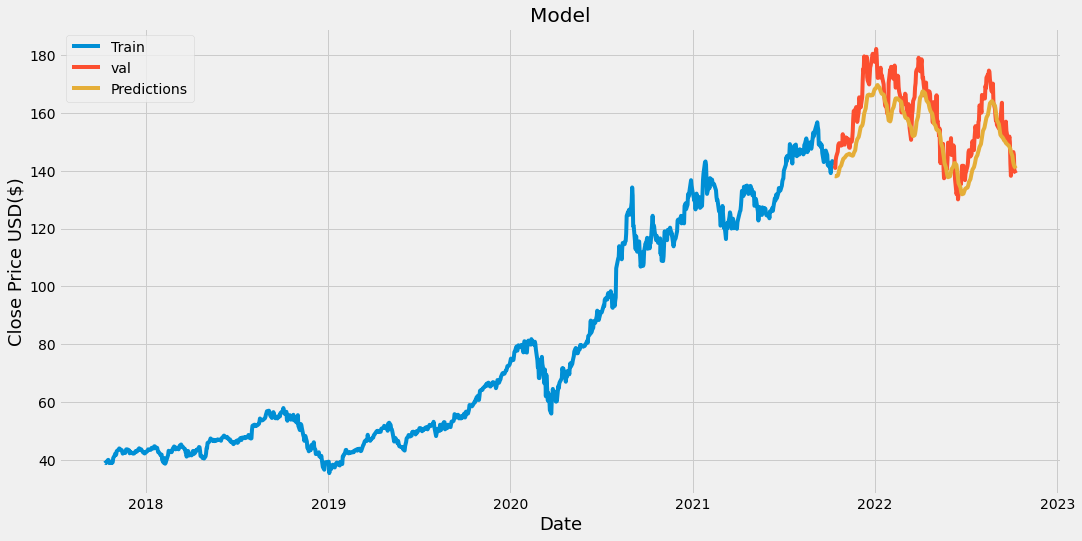

In [27]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','val','Predictions'])
plt.show()

In [28]:
valid


,High,Low,Open,Close,Volume,Adj Close,Predictions
Date,,,,,,,
2021-10-12,143.250000,141.039993,143.229996,141.509995,73035900.0,140.721451,138.118698
2021-10-13,141.399994,139.199997,141.240005,140.910004,78762700.0,140.124802,138.094635
2021-10-14,143.880005,141.509995,142.110001,143.759995,69907100.0,142.958908,138.012268
2021-10-15,144.899994,143.509995,143.770004,144.839996,67940300.0,144.032898,138.085083
2021-10-18,146.839996,143.160004,143.449997,146.550003,85589200.0,145.733383,138.315048
...,...,...,...,...,...,...,...
2022-10-04,146.220001,144.259995,145.029999,146.100006,87830100.0,146.100006,143.668625
2022-10-05,147.380005,143.009995,144.070007,146.399994,79471000.0,146.399994,142.658035
2022-10-06,147.539993,145.220001,145.809998,145.429993,68402200.0,145.429993,141.959732
